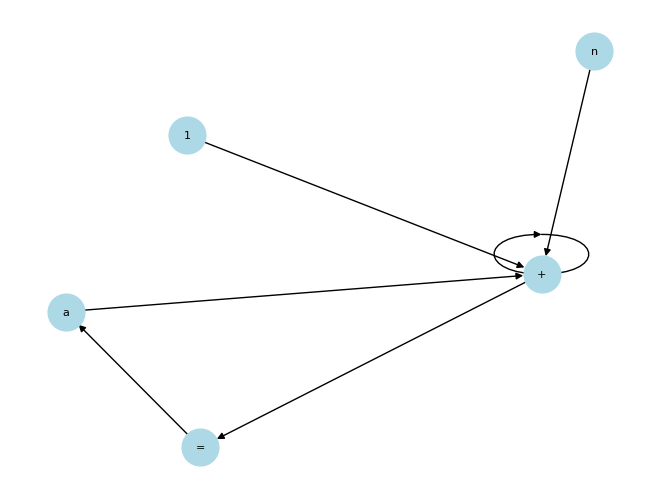

In [20]:
import re
import networkx as nx
import matplotlib.pyplot as plt

class Node:
    pass
class Assignment(Node):
    def __init__(self, left, op, right):
        self.left = left
        self.op = op
        self.right = right
class BinOp(Node):
    def __init__(self, left, op, right):
        self.left = left
        self.op = op
        self.right = right

class Num(Node):
    def __init__(self, value):
        self.value = value

class Var(Node):
    def __init__(self, name):
        self.name = name

def parse_expression(tokens):
    return parse_addition(tokens)

def parse_addition(tokens):
    left = parse_multiplication(tokens)
    while tokens and tokens[0] in ('+', '-'):
        op = tokens.pop(0)
        right = parse_multiplication(tokens)
        left = BinOp(left, op, right)
    return left

def parse_multiplication(tokens):
    left = parse_atom(tokens)
    while tokens and tokens[0] in ('*', '/'):
        op = tokens.pop(0)
        right = parse_atom(tokens)
        left = BinOp(left, op, right)
    return left

def parse_atom(tokens):
    if tokens and tokens[0].isdigit():
        return Num(int(tokens.pop(0)))
    elif tokens and re.match(r'^[a-zA-Z_][a-zA-Z0-9_]*$', tokens[0]):
        return Var(tokens.pop(0))
    else:
        raise SyntaxError("Invalid expression")

def tokenize(expression):
    # Split the expression into tokens (numbers, variables, and operators)
    return [token.strip() for token in re.findall(r'\b(?:\d+|[a-zA-Z_][a-zA-Z0-9_]*)\b|\S', expression)]

def expression_to_ast(expression):
    l,r=expression.split('=')
    tokens = tokenize(r)
    expr=Assignment(Var(l),'=',parse_expression(tokens))
    return expr

def ast_to_graph(ast_node, graph,label):
    if isinstance(ast_node, BinOp):
        label[ast_node]=ast_node.op
        graph.add_node(ast_node, label=label)
        ast_to_graph(ast_node.left, graph,label)
        ast_to_graph(ast_node.right, graph,label)
        graph.add_edge(ast_node.left, ast_node)
        graph.add_edge(ast_node.right, ast_node)
    elif isinstance(ast_node, Num):
        label[ast_node]=ast_node.value
        graph.add_node(ast_node, label=label)
    elif isinstance(ast_node, Var):
        label[ast_node]=ast_node.name
        graph.add_node(ast_node, label=label)
    elif isinstance(ast_node,Assignment):
        label[ast_node]=ast_node.op
        graph.add_node(ast_node, label=label)
        ast_to_graph(ast_node.left, graph,label)
        ast_to_graph(ast_node.right, graph,label)
        graph.add_edge( ast_node,ast_node.left)
        graph.add_edge(ast_node.right, ast_node)
# Example usage
expression = "a=a+1+n"
ast = expression_to_ast(expression)

# Create a directed graph
graph = nx.DiGraph()
label={}
# Convert AST to graph
ast_to_graph(ast, graph,label)
graph=nx.relabel_nodes(graph,label)
# Plot the graph with labels
pos = nx.spring_layout(graph)
labels = nx.get_edge_attributes(graph, 'label')
nx.draw(graph, pos, with_labels=True, node_size=700, node_color='lightblue', font_size=8)
nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels, font_color='red', font_size=8)

plt.show()
